# Understanding the Basics: 

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

#!pip3 install qiskit

## Choosing backend simulators
Here is a nice article <a href=https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463> Qiskit Backends: what they are and how to work with them </a> on backend algorithms. 

First find all the simulators and use some of them.

In [2]:
for backend in Aer.backends():
    print(backend.name() )

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Here is the description on what each simulators do:

* **QasmSimulator**: Allows ideal and noisy multi-shot execution of qiskit circuits and returns counts or memory.

* **UnitarySimulator**: Allows ideal single-shot execution of qiskit circuits and returns the final unitary matrix of the circuit itself.

* **StatevectorSimulator**: Allows ideal single-shot execution of qiskit circuits and returns the final statevector of the simulator after application.

* **pulse_simulator**: The PulseSimulator simulates continuous time Hamiltonian dynamics of a quantum system, with controls specified by pulse Schedule objects, and the model of the physical system specified by PulseSystemModel objects. Results are returned in the same format as when jobs are submitted to actual devices.

In [3]:
sim_qsm = Aer.get_backend('qasm_simulator')
sim_svec = Aer.get_backend('statevector_simulator')
sim_uni = Aer.get_backend('unitary_simulator')

In [4]:
circuit = QuantumCircuit(2,2)
circuit.draw()

q_0: 
     
q_1: 
     
c_0: 
     
c_1:

In [5]:
from qiskit import QuantumRegister, ClassicalRegister

# construct a circuit
# syntax QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))

#qr=QuantumRegister(2); print (qr)
#cr=ClassicalRegister(2); print (cr)
#circuit1 = QuantumCircuit(qr, cr)
#circuit1.draw()

## Hadamard Gate 


Hadamard gate is single qubit operator. $H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$
This transforms |0> state to a superposed state $\frac{1}{\sqrt{2}}\left( |0>+|1> \right)$ and stae|1> to a superposed state $\frac{1}{\sqrt{2}}\left( |0>-|1> \right)$. This gate is very important gate to construct Bell state, Quantum Fourier Transform (QFT) and many more.  Can be seen as a simple test by using the vector notaions $|0> = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$; $|1> = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and acting H on |0> and |1>.

$H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$


<img src="figs/quantum_circuit_as_matrix.png" width=600 />



In [6]:
# Add a Hadamart (H gate) on qubit 0
circuit.h(0)
circuit.cx(0, 1)
#circuit.measure([0,1], [0,1])


A controlled-Not operation (CX) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

The CNOT gate operates on a quantum register consisting of 2 qubits. The CNOT gate flips the second qubit (the target qubit) if and only if the first qubit (the control qubit) is |1>.

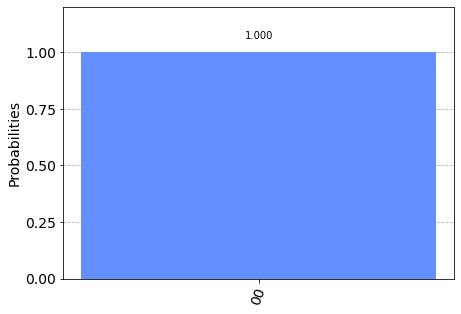

In [7]:
job_uni = execute(circuit, sim_uni, shots=1000)
res_uni = job_uni.result()
counts_uni = res_uni.get_counts(circuit)
plot_histogram(counts_uni)


In [8]:
job_qsm = execute(circuit, sim_qsm, shots=1000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(circuit)
circuit.draw()


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c_0: ══════════
               
c_1: ══════════

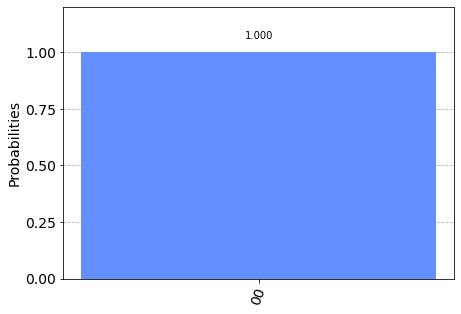

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_qsm)

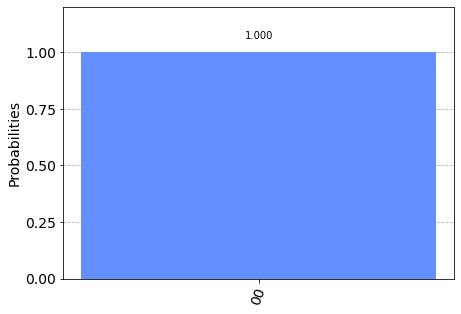

In [10]:
job_svec = execute(circuit, sim_svec, shots=1000)
res_svec = job_svec.result()
counts_svec = res_svec.get_counts(circuit)
plot_histogram(counts_svec)


In [11]:
#This produced errors.
#job_uni = execute(circuit, sim_uni, shots=1000)
#res_uni = job_uni.result()
#counts_uni = res_uni.get_counts(circuit)
#plot_histogram(counts_uni)


## Try some other gates

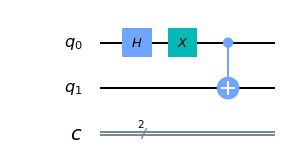

In [12]:
ckt = QuantumCircuit(2,2)
ckt.h(0)
ckt.x(0)
ckt.cx(0,1)
ckt.draw('mpl')

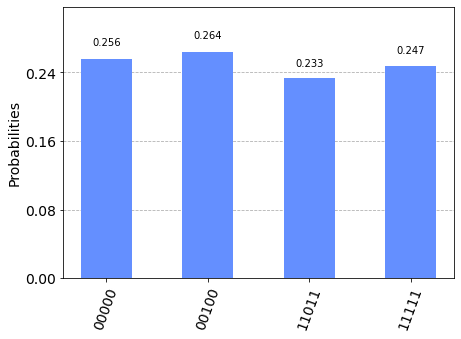

In [13]:
qc = QuantumCircuit(5)
qc.h([0, 2])
qc.cx(0, range(1, 5))
qc.measure_all()

job_qsm = execute(qc, sim_qsm, shots=1000)
res_qsm = job_qsm.result()
#print (res_qsm)
counts_qsm = res_qsm.get_counts()
qc.draw('mpl')
plot_histogram(counts_qsm)

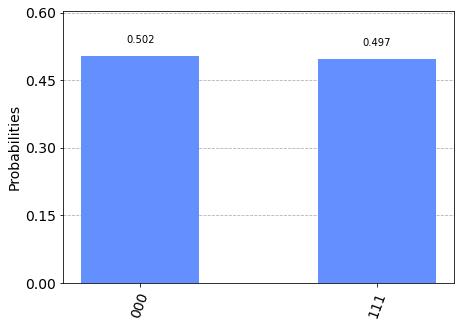

In [14]:

qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0,1,2],[0,1,2])
qc.draw()
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
result = execute(qc, backend, shots = 2000).result() # we run the simulation
counts = result.get_counts() # we get the counts
plot_histogram(counts)

